# Implementation exercise: Linear Classification

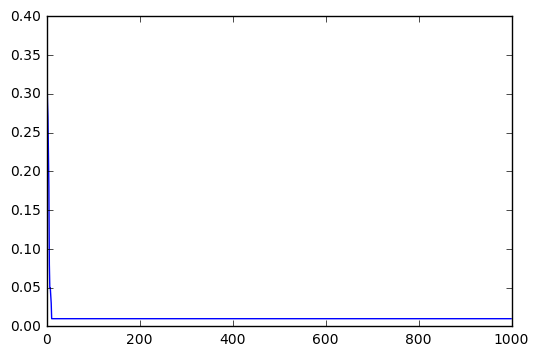

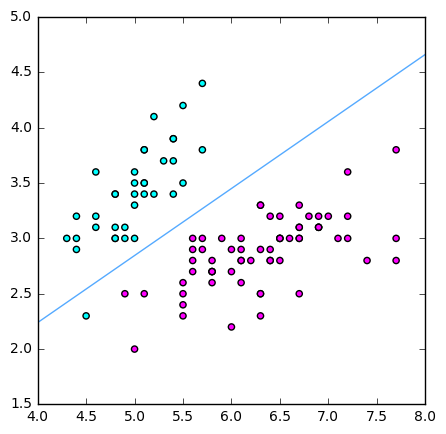

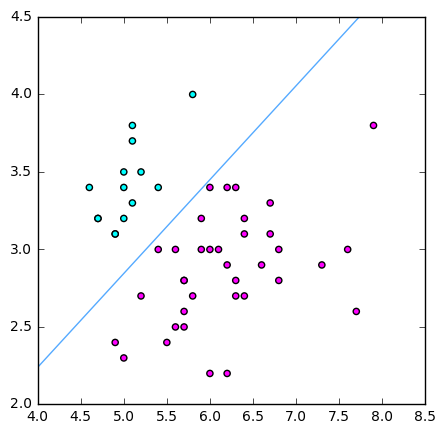

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
%matplotlib inline  

def plot_decision_boundary(X, Z, W=None, b=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X[:,0], X[:,1], c=Z, cmap=plt.cm.cool)
    ax.set_autoscale_on(False)

    a = - W[0, 0] / W[0, 1]
    xx = np.linspace(-30, 30)
    yy = a * xx - (b[0]) / W[0, 1]

    ax.plot(xx, yy, 'k-', c=plt.cm.cool(1.0/3.0))
    
def loadDataset(split, X=[] , XT=[], Z = [], ZT = []):
    dataset = datasets.load_iris()
    c = list(zip(dataset['data'], dataset['target']))
    np.random.seed(224)
    np.random.shuffle(c)
    x, t = zip(*c)
    sp = int(split*len(c))
    X = x[:sp]
    XT = x[sp:]
    Z = t[:sp]
    ZT = t[sp:]
    names = ['Sepal. length', 'Sepal. width', 'Petal. length', 'Petal. width']
    return np.array(X), np.array(XT), np.array(Z), np.array(ZT), names

def sigmoid(a):
    return 1 / (1 + math.exp(-a))

def prior(Z,pc=[]):
    c0Count=0
    c1Counret=0
    for i in Z:
        if i==0:
            c0Count = c0Count+1
        else:
            c1Count = c1Count+1
    pc.append(c0Count/len(Z))
    pc.append(c1Count/len(Z))
    return pc
        

# prepare data
split = 0.67
X, XT, Z, ZT, names = loadDataset(split)

# combine two of the 3 classes for a 2 class problem
Z[Z==2] = 1
ZT[ZT==2] = 1

# only look at 2 dimensions of the input data for easy visualisation
X = X[:,:2]
XT = XT[:,:2]


'''Exercise 1: Calculate probability of class 1
Compute the probability of class 1 given the data and the parameters.
arguments:
X: data
W: weight matrix, part of the parameters
b: bias, part of the parameters
returns:
rate: probabiliy of the predicted class 1'''

def pred(X, W, b):
    xwt = np.dot(X,W.T)
    result = np.empty((X.shape[0],1))
    for i in range(len(xwt)):
        px = sigmoid(xwt[i]+b)
        result[i] = px
    return result


'''
Exercise 2: Calculate the log-likelihood given the target
Compute the logarithm of the likelihood for logistic regression. The negative log-likelihood is our loss function.
arguments:
X: data
Z: target
W: weight matrix, part of the parameters
b: bias, part of the parameters
returns:
log likelihood: logarithm of the likelihood
'''

def loglikelihood(X, Z, W, b):
    llh = np.empty_like(Z)
    Y = pred(X,W,b)
    for i in range(len(Z)):
        if Z[i]==1:
            llh[i] = math.log(Y[i])
        else:
            llh[i] = math.log(1-Y[i])
    return llh

'''
Exercise 3: Implement the gradient of the loss/log-likelihood
Compute the gradient of the loss with respect to the parameters
arguments:
X: data
Z: target
W: weight matrix, part of the parameters
b: bias, part of the parameters
returns:
dLdW: gradient of loss wrt to W
dLdb: gradient of loss wrt to b
'''
def grad(X, Z, W, b):
    Y = pred(X,W,b)
    dLdW = np.zeros_like(W)
    dLdb = np.zeros_like(b)
    for i in range(len(Z)):
        gd = np.dot(np.asmatrix((Y[i]-Z[i])),np.asmatrix(X[i]))
        dLdW = dLdW + gd
        dLdb = dLdb + (Y[i]-Z[i])
    return dLdW, dLdb

'''
Exercise 4: Test everything
Run the provied simple gradient descent algorithm to optimize the model parameters and plot the resuling decision 
boundary.
'''

W = np.random.randn(1,2) * 0.01
b = np.random.randn(1) * 0.01

learning_rate = 0.001
train_loss = []
validation_loss = []

for i in range(1000):
    dLdW, dLdb = grad(X, Z, W, b)
    
    W -= learning_rate * dLdW
    b -= learning_rate * dLdb
    train_loss.append( - loglikelihood(X, Z, W, b).mean())

_ = plt.plot(train_loss)

# Decision boundary on the training set
plot_decision_boundary(X, Z, W=W, b=b)

# Decision boundary on the test set
plot_decision_boundary(XT, ZT, W=W, b=b)